In [1]:
import scipy.io

fName = r"D:\Documentos\LIAE\simulacao_inversor\Results\1_1.mat"

# Load the MATLAB file
mat_data = scipy.io.loadmat(fName)

print(f'Reference frequency: {mat_data["freq_ref"][0][0]} Hz')
print(f'Reference current: {mat_data["I_ref"][0][0]} Hz')
print(f'Capacitor capacitance: {mat_data["capacitor_C"][0][0]} F')
print(f'Capacitor resistance: {mat_data["capacitor_R"][0][0]} V')
print(f'Source resistance: {mat_data["source_R"][0][0]} Ohm')
print(f'Source inductance: {mat_data["source_L"][0][0]} H')

Reference frequency: 30 Hz
Reference current: 4.5 Hz
Capacitor capacitance: 0.000332 F
Capacitor resistance: 0.03 V
Source resistance: 0 Ohm
Source inductance: 0 H


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


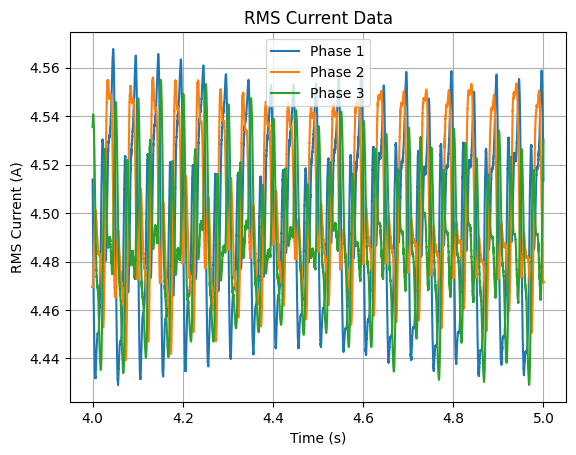

RMS value of I_Out: [4.50355841 4.50469837 4.49491378]


In [2]:
# Plot the RMS current data

import matplotlib.pyplot as plt
import numpy as np

# Extract the RMS current data
I_Out_RMS = mat_data['I_Out_RMS']
I_Out = mat_data['I_Out']

# Build the time vector
dt = mat_data['dt'][0][0]
t0 = mat_data['t0'][0][0]
time_vector = t0 + dt * np.arange(I_Out_RMS.shape[0])

# Plot the RMS current data
plt.plot(time_vector, I_Out_RMS)
plt.title('RMS Current Data')
plt.xlabel('Time (s)')
plt.ylabel('RMS Current (A)')
plt.legend(['Phase 1', 'Phase 2', 'Phase 3'])
plt.grid(True)
plt.show()

# Calculate the RMS value of I_Out
I_Out_RMS_value = np.sqrt(np.mean(I_Out**2, axis=0))
print("RMS value of I_Out:", I_Out_RMS_value)

In [3]:
from scipy.stats import skew, kurtosis

# Calculate mean
mean_I_Out = np.mean(I_Out, axis=0)

# Calculate standard deviation
std_I_Out = np.std(I_Out, axis=0)

# Calculate min
min_I_Out = np.min(I_Out, axis=0)

# Calculate max
max_I_Out = np.max(I_Out, axis=0)

# Calculate skewness
skew_I_Out = skew(I_Out, axis=0)

# Calculate kurtosis
kurtosis_I_Out = kurtosis(I_Out, axis=0)

# Print the extracted features
print("Mean of I_Out:", mean_I_Out)
print("Standard Deviation of I_Out:", std_I_Out)
print("Min of I_Out:", min_I_Out)
print("Max of I_Out:", max_I_Out)
print("Skewness of I_Out:", skew_I_Out)
print("Kurtosis of I_Out:", kurtosis_I_Out)

Mean of I_Out: [-0.01175569 -0.00843594  0.02019162]
Standard Deviation of I_Out: [4.50354307 4.50469047 4.49486843]
Min of I_Out: [-6.74074101 -6.5892104  -6.56552289]
Max of I_Out: [6.70513643 6.60608961 6.63279008]
Skewness of I_Out: [-0.00049916  0.00369636 -0.00105319]
Kurtosis of I_Out: [-1.49309409 -1.49961215 -1.4947898 ]


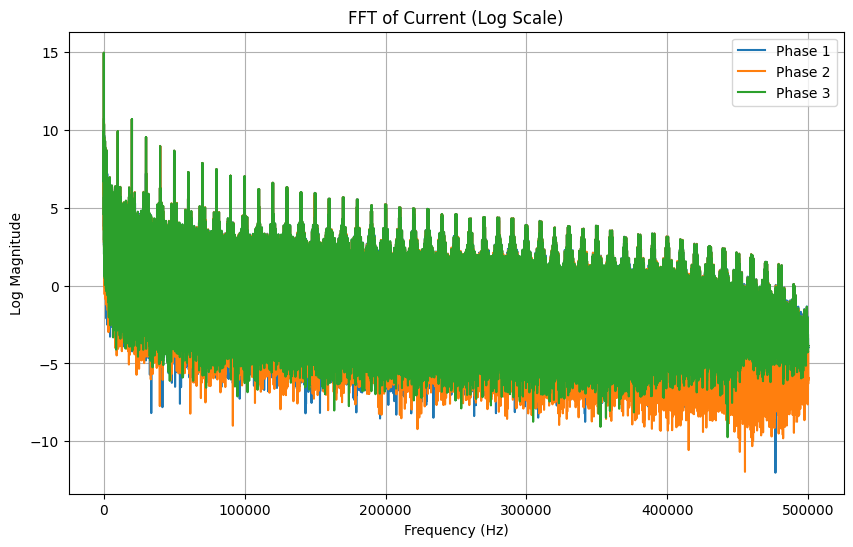

In [5]:
from numpy.fft import fft

# Compute the FFT of the current
I_Out_fft = fft(I_Out, axis=0)

# Compute the frequency vector
n = I_Out.shape[0]
freq_vector = np.fft.fftfreq(n, dt)

# Plot the FFT of the current in log scale
plt.figure(figsize=(10, 6))
plt.plot(freq_vector[:n // 2], np.log(np.abs(I_Out_fft[:n // 2])))
plt.title('FFT of Current (Log Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Magnitude')
plt.legend(['Phase 1', 'Phase 2', 'Phase 3'])
plt.grid(True)
plt.show()